In [67]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [68]:
silver_files = os.listdir('silver_data')
silver_files.sort()
silver_files

['BodyFatPercentage.csv',
 'BodyMass.csv',
 'HeartRate.csv',
 'HeartRateVariabilitySDNN.csv',
 'LeanBodyMass.csv',
 'RestingHeartRate.csv',
 'WalkingHeartRateAverage.csv']

In [69]:
dfs = []

for silver_file in silver_files:
    df = pd.read_csv(f'silver_data/{silver_file}')
    
    # extract date part of the creation datetime after making it an datetime
    df.index = pd.to_datetime(df['creationDate']).dt.date
    df.drop(columns=['creationDate'], inplace=True)

    # grouping by date and taking mean value for that day
    df_v2 = df.groupby(df.index)[df.columns[0]].mean().reset_index()
    
    # setting the date as index
    df_v2.index = pd.to_datetime(df_v2['creationDate'])
    df_v2.drop(columns=['creationDate'], inplace=True)

    dfs.append(df_v2)

dfs

[              BodyFatPercentage in %
 creationDate                        
 2025-01-01                  0.248697
 2025-01-02                  0.248060
 2025-01-03                  0.241750
 2025-01-04                  0.258260
 2025-01-05                  0.259090
 ...                              ...
 2025-05-02                  0.247257
 2025-05-03                  0.249070
 2025-05-04                  0.246990
 2025-05-05                  0.253290
 2025-05-06                  0.243570
 
 [102 rows x 1 columns],
               BodyMass in kg
 creationDate                
 2025-01-01         73.762000
 2025-01-02         74.337000
 2025-01-03         74.293000
 2025-01-04         74.847000
 2025-01-05         74.376000
 ...                      ...
 2025-05-02         74.100333
 2025-05-03         73.352000
 2025-05-04         73.324000
 2025-05-05         73.374500
 2025-05-06         73.654000
 
 [107 rows x 1 columns],
               HeartRate in count/min
 creationDate           

In [70]:
df = pd.concat(dfs, axis=1)
df

,BodyFatPercentage in %,BodyMass in kg,HeartRate in count/min,HeartRateVariabilitySDNN in ms,LeanBodyMass in kg,RestingHeartRate in count/min,WalkingHeartRateAverage in count/min
creationDate,,,,,,,
2025-01-01,0.248697,73.762000,78.166059,65.976673,55.418667,76.0,116.0
2025-01-02,0.248060,74.337000,81.588822,99.210173,55.897000,67.5,103.5
2025-01-03,0.241750,74.293000,77.283236,87.154564,56.333000,NaN,NaN
2025-01-04,0.258260,74.847000,76.462807,91.516930,55.517000,69.0,111.5
2025-01-05,0.259090,74.376000,95.303602,85.761182,55.106000,NaN,NaN
...,...,...,...,...,...,...,...
2025-05-02,0.247257,74.100333,78.240483,76.274867,55.780333,NaN,NaN
2025-05-03,0.249070,73.352000,106.153272,58.888818,55.082000,76.0,114.0
2025-05-04,0.246990,73.324000,77.483923,93.356560,55.214000,70.0,97.0


In [71]:
df.isna().sum()

BodyFatPercentage in %                  23
BodyMass in kg                          18
HeartRate in count/min                   2
HeartRateVariabilitySDNN in ms           3
LeanBodyMass in kg                      22
RestingHeartRate in count/min           27
WalkingHeartRateAverage in count/min    23
dtype: int64

In [72]:
df.interpolate(method='time', inplace=True)
df

,BodyFatPercentage in %,BodyMass in kg,HeartRate in count/min,HeartRateVariabilitySDNN in ms,LeanBodyMass in kg,RestingHeartRate in count/min,WalkingHeartRateAverage in count/min
creationDate,,,,,,,
2025-01-01,0.248697,73.762000,78.166059,65.976673,55.418667,76.00,116.00
2025-01-02,0.248060,74.337000,81.588822,99.210173,55.897000,67.50,103.50
2025-01-03,0.241750,74.293000,77.283236,87.154564,56.333000,68.25,107.50
2025-01-04,0.258260,74.847000,76.462807,91.516930,55.517000,69.00,111.50
2025-01-05,0.259090,74.376000,95.303602,85.761182,55.106000,68.25,113.50
...,...,...,...,...,...,...,...
2025-05-02,0.247257,74.100333,78.240483,76.274867,55.780333,71.00,110.25
2025-05-03,0.249070,73.352000,106.153272,58.888818,55.082000,76.00,114.00
2025-05-04,0.246990,73.324000,77.483923,93.356560,55.214000,70.00,97.00


In [73]:
df.isna().sum()

BodyFatPercentage in %                  0
BodyMass in kg                          0
HeartRate in count/min                  0
HeartRateVariabilitySDNN in ms          0
LeanBodyMass in kg                      0
RestingHeartRate in count/min           0
WalkingHeartRateAverage in count/min    0
dtype: int64

In [74]:
# Dieting timeline
# January 1     to March 9th    Not on diet
# March 10th    to March 27th   On diet
# March 28th    to April 26th   Not on diet
# April 27th    to now          On diet

# Jan: 01
# Feb: 02
# Mar: 03
# Apr: 04
# May: 05
# Jun: 06

# datetime is of format: '2025-04-12T00:00:00.000000000'
def am_i_on_diet(datetime: str) -> bool:
    date = datetime.split('T')[0] # date format: '2025-04-12'
    _, month, day = date.split('-')

    dayNum = int(day)

    # March 10th    to March 27th   On diet
    if month == '03' and 10 <= dayNum <= 27:
        return True

    # April 27th    to now          On diet
    if month == '04' and 27 <= dayNum:
        return True

    if month == '05':
        return True

    # For any other datetime
    return False

In [75]:
on_diet_df = pd.DataFrame(
    [(datetime, int(am_i_on_diet(str(datetime)))) for datetime in df.index.values],
    columns=['date', 'on diet']
)


on_diet_df.index = on_diet_df['date']
on_diet_df.drop(columns=['date'], inplace=True)

on_diet_df

,on diet
date,
2025-01-01,0
2025-01-02,0
2025-01-03,0
2025-01-04,0
2025-01-05,0
...,...
2025-05-02,1
2025-05-03,1
2025-05-04,1


In [76]:
combined_df = pd.concat([df, on_diet_df], axis=1)
combined_df

,BodyFatPercentage in %,BodyMass in kg,HeartRate in count/min,HeartRateVariabilitySDNN in ms,LeanBodyMass in kg,RestingHeartRate in count/min,WalkingHeartRateAverage in count/min,on diet
2025-01-01,0.248697,73.762000,78.166059,65.976673,55.418667,76.00,116.00,0
2025-01-02,0.248060,74.337000,81.588822,99.210173,55.897000,67.50,103.50,0
2025-01-03,0.241750,74.293000,77.283236,87.154564,56.333000,68.25,107.50,0
2025-01-04,0.258260,74.847000,76.462807,91.516930,55.517000,69.00,111.50,0
2025-01-05,0.259090,74.376000,95.303602,85.761182,55.106000,68.25,113.50,0
...,...,...,...,...,...,...,...,...
2025-05-02,0.247257,74.100333,78.240483,76.274867,55.780333,71.00,110.25,1
2025-05-03,0.249070,73.352000,106.153272,58.888818,55.082000,76.00,114.00,1
2025-05-04,0.246990,73.324000,77.483923,93.356560,55.214000,70.00,97.00,1
2025-05-05,0.253290,73.374500,77.283055,93.410123,54.789500,66.00,101.00,1


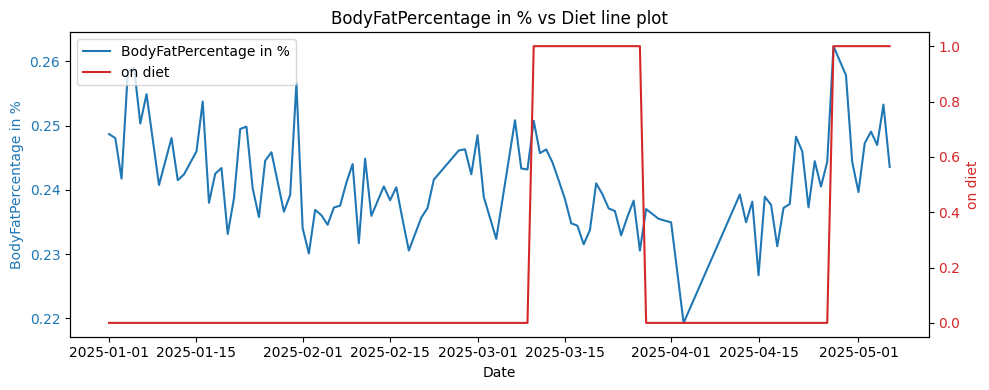

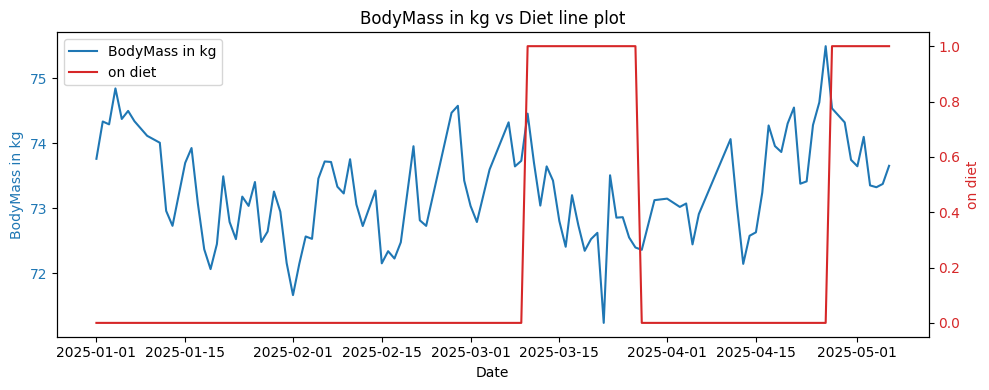

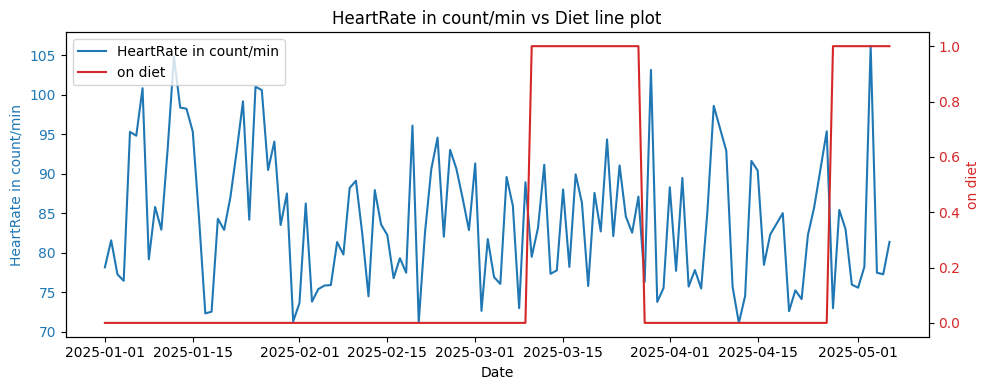

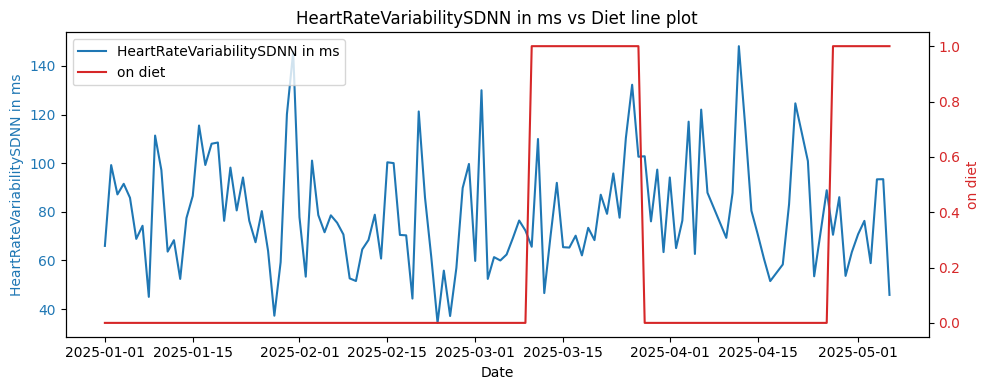

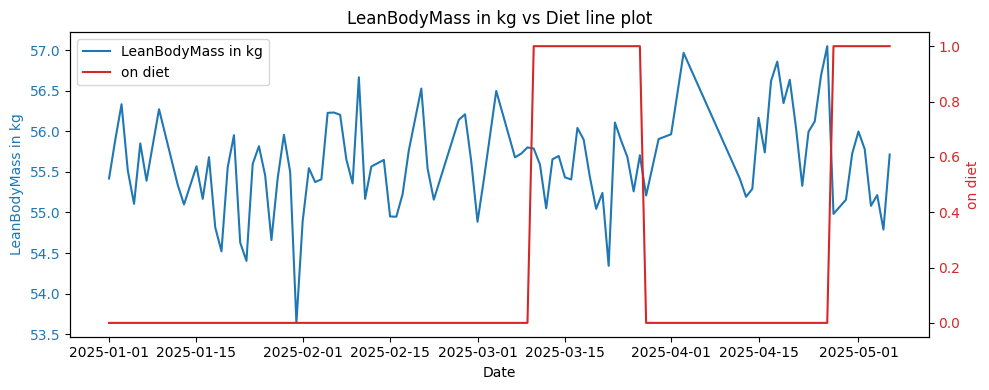

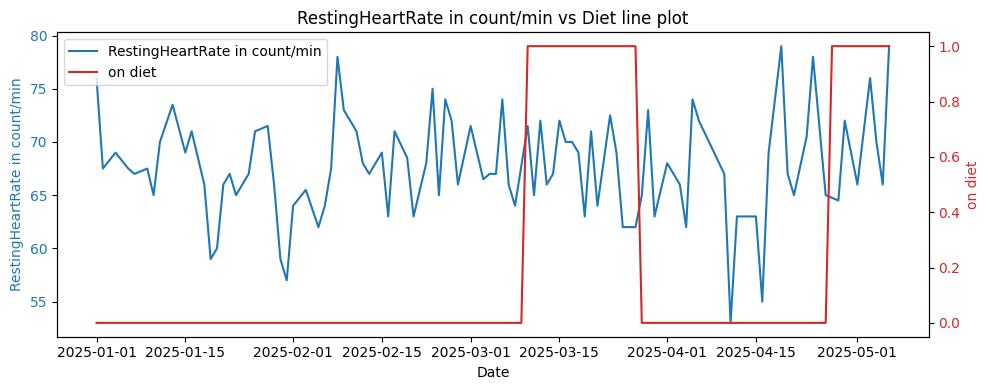

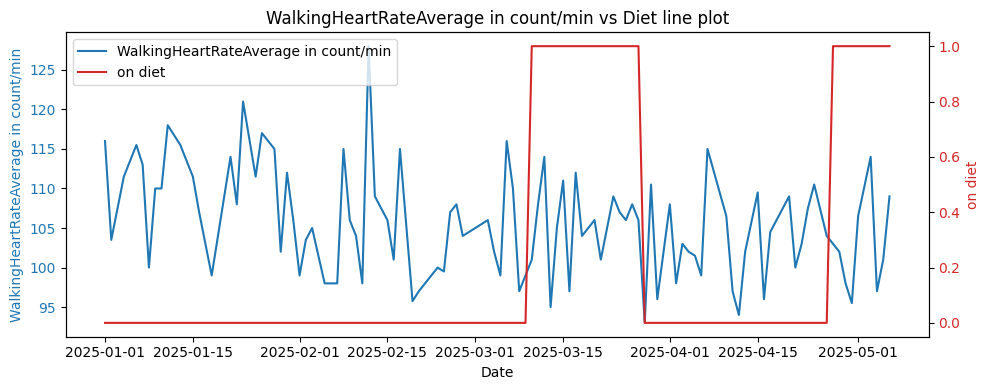

In [79]:
for column in combined_df.columns:
    if column == 'on diet': continue

    # column = 'BodyFatPercentage in %'
    on_diet = 'on diet'

    # Create the figure and primary axis
    fig, ax1 = plt.subplots(figsize=(10, 4))

    # Plot the small scale data on the primary y-axis
    color1 = 'tab:blue'
    ax1.set_xlabel('Date')
    ax1.set_ylabel(column, color=color1)
    ax1.plot(combined_df.index, combined_df[column], color=color1, label=column)
    ax1.tick_params(axis='y', labelcolor=color1)

    # Create a secondary y-axis that shares the same x-axis
    ax2 = ax1.twinx()

    # Plot the large scale data on the secondary y-axis
    color2 = 'tab:red'
    ax2.set_ylabel(on_diet, color=color2)
    ax2.plot(combined_df.index, combined_df[on_diet], color=color2, label=on_diet)
    ax2.tick_params(axis='y', labelcolor=color2)

    # Add a title and adjust layout
    plt.title(f'{column} vs Diet line plot')
    fig.tight_layout()

    # Add legends
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

    plt.show()